In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import lightgbm as lgb
import gc

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

###  Evaluate the feature importance

In [42]:
# load the lightgbm model
bst1 = lgb.Booster(model_file='../models/lightGBM_morefeatures_80_10.txt')

In [43]:
plt.rcParams["figure.figsize"] = 9, 7

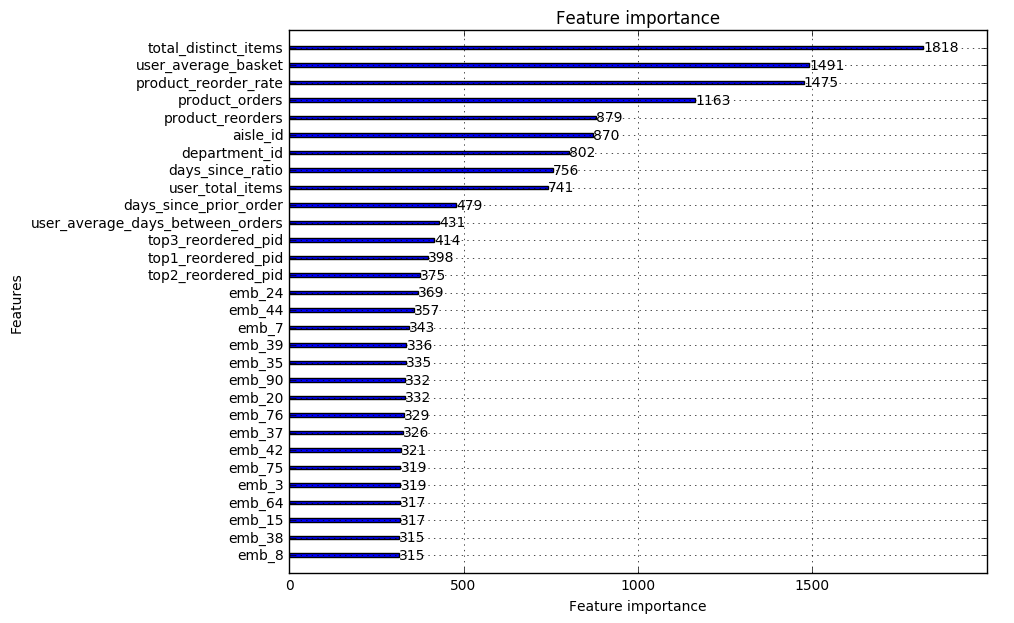

In [44]:
lgb.plot_importance(bst1, max_num_features= 30)

### Select/Test different threshold to generate the predictions

In [45]:
prob_preds_df = pd.read_csv("../data/processed/lightGBM_morefeatures_prob_preds.csv")

In [46]:
prob_preds_df.head()

,order_id,pred,product_id
0,2774568,0.165027,17668
1,2774568,0.163123,39190
2,2774568,0.123430,44683
3,2774568,0.381907,21903
4,2774568,0.152347,14992


In [47]:
prob_preds_df.shape

(4833292, 3)

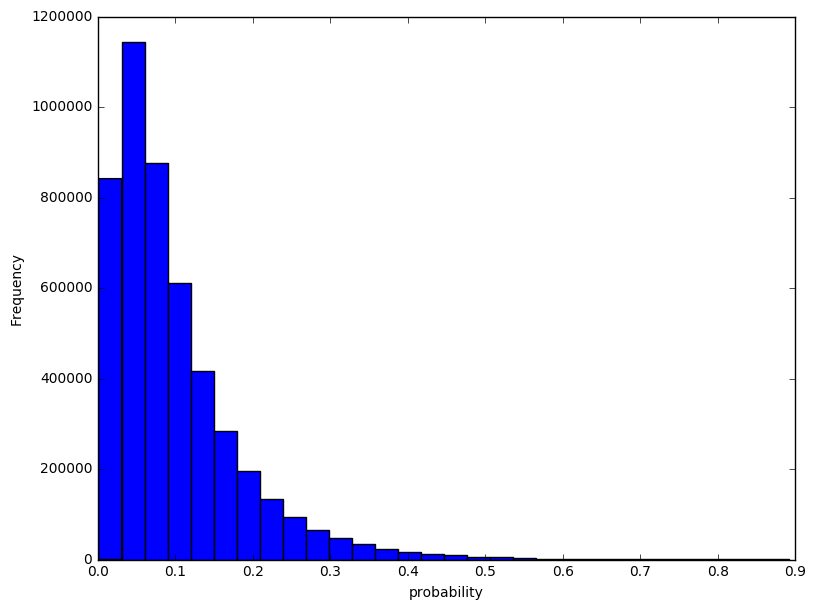

In [60]:
ax = prob_preds_df['pred'].plot.hist(bins = 30)
ax.set_xlabel("probability")

In [48]:
def generate_submission(df_test, test_orders_ids, file_name, threshold = 0.2, single_thres = True):
    """function to generate label predictions submission format"""
    if single_thres:
        TRESHOLD = threshold

        d = dict()
        for row in df_test.itertuples():
            if row.pred > TRESHOLD:
                try:
                    d[row.order_id] += ' ' + str(row.product_id)
                except:
                    d[row.order_id] = str(row.product_id)

        for order in test_orders_ids:
            if order not in d:
                d[order] = 'None'

        sub = pd.DataFrame.from_dict(d, orient='index')
        sub.reset_index(inplace=True)
        sub.columns = ['order_id', 'products']
        sub.to_csv(file_name, index=False)
    else:
        pass

In [49]:
orders_df = pd.read_csv("../data/raw/orders.csv")

In [50]:
test_orders_ids = orders_df[orders_df.eval_set == "test"].order_id

In [51]:
generate_submission(prob_preds_df, test_orders_ids, "../models/lightGBM_morefeatures_preds_30%thr.csv", threshold = 0.3, single_thres = True)

In [54]:
generate_submission(prob_preds_df, test_orders_ids, "../models/lightGBM_morefeatures_preds_25%thr.csv", threshold = 0.25, single_thres = True)

In [55]:
generate_submission(prob_preds_df, test_orders_ids, "../models/lightGBM_morefeatures_preds_15%thr.csv", threshold = 0.15, single_thres = True)

In [56]:
generate_submission(prob_preds_df, test_orders_ids, "../models/lightGBM_morefeatures_preds_10%thr.csv", threshold = 0.1, single_thres = True)